Filter the Stopping Words

### Read Data

In [2]:
import os

print("Current Working Directory:", os.getcwd())
files=["../data/ScienceandEducation/UniversityofBath.txt","../data/ScienceandEducation/wikipedia.txt"]
file_contents=[]
for x in files:
    with open(x,'r',encoding='utf-8', errors='ignore') as file:
        content = file.read()
        file_contents.append(content)
print(file_contents)

Current Working Directory: d:\MyData\University Data\Semester 6\GT\Project\GT-Document-Classification\PreProcessing
["    What is engineering?                           Skip to main content       University of Bath    Staff Students Alumni          University of Bath    Open menu   Courses Research Enterprise Sport Departments About    Staff Students Alumni       Open search                Faculty of Engineering & Design    Menu                        Departments and rankings                    Back Departments and rankings    Our Departments  Back  Our Departments    Architecture & Civil Engineering   Chemical Engineering   Electronic & Electrical Engineering   Mechanical Engineering     Rankings and reputation  Back  Rankings and reputation    Rankings                           Courses                    Back Courses    Our Courses  Back  Our Courses    Undergraduate courses   Taught postgraduate courses   Postgraduate research courses     Undergraduate study  Back  Undergraduate stu

### Filter Words

In [6]:

import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
print(stopwords.words('english'))
# remove wide Spaces
filter_words=[]
stopWordslist=stopwords.words('English')
stopWordslist.extend([',','.','@'])
for x in file_contents:
    data = re.sub(r'\s+', ' ', x)
    words = data.split(' ')
    words=[x for x in words if len(x)>0]
    filter_words.append([w for w in words if w not in stopwords.words('English')])
print(filter_words)
for index in range(len(files)):
    with open(f'../CleanData/{files[index]}', 'w', encoding='utf-8') as file:
        content = ' '.join(filter_words[index])
        file.write(content)


[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Waseem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

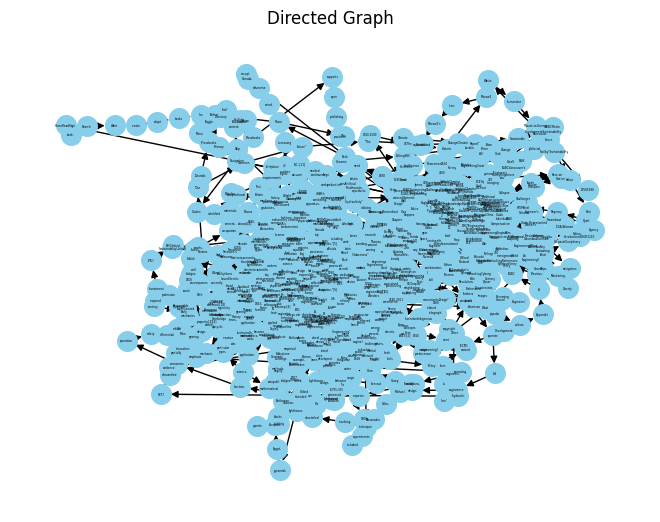

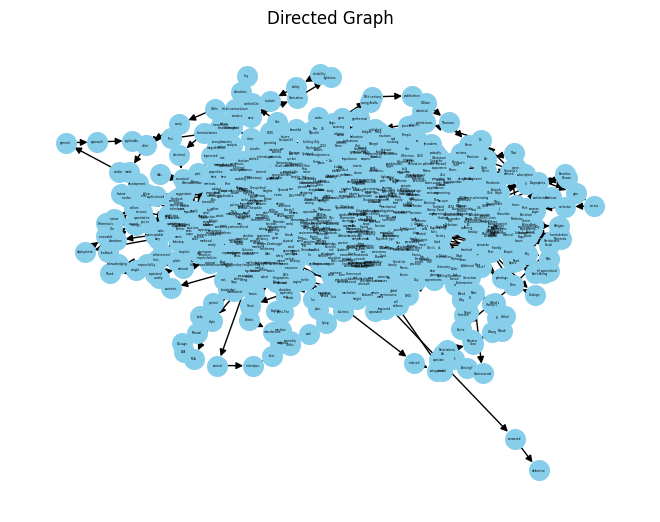

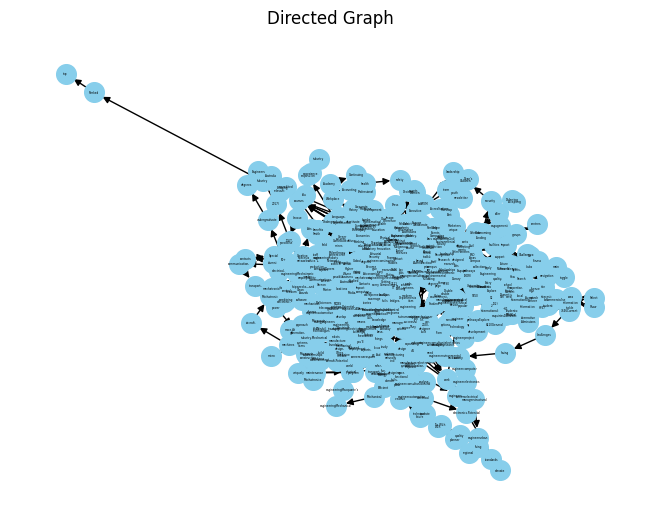

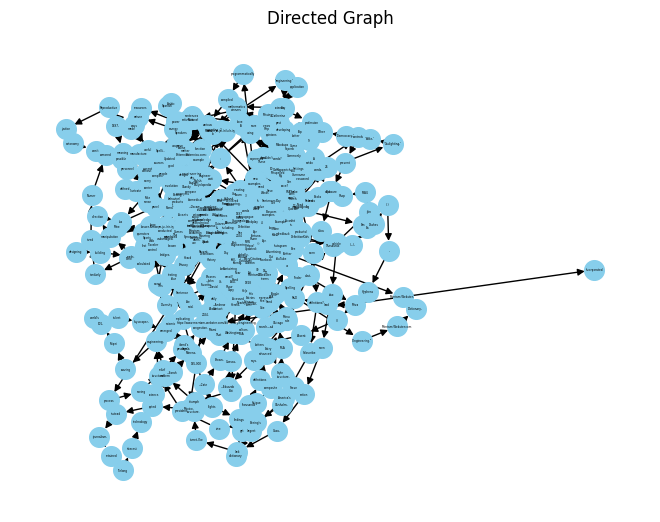

c:\Users\Muhammad Waseem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 62404 (\uf3c4) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


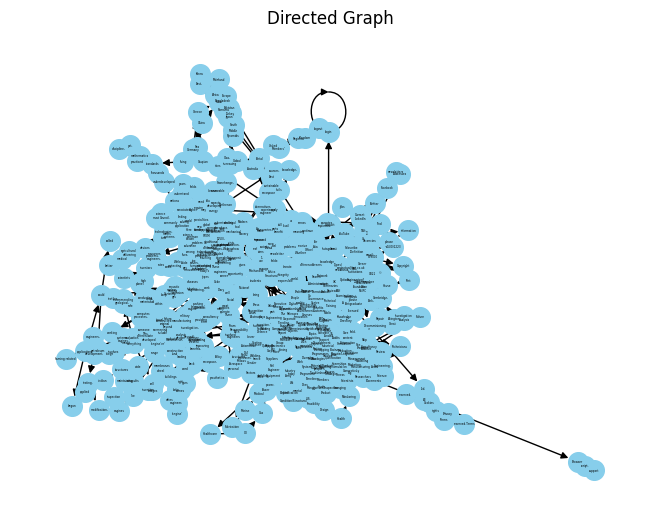

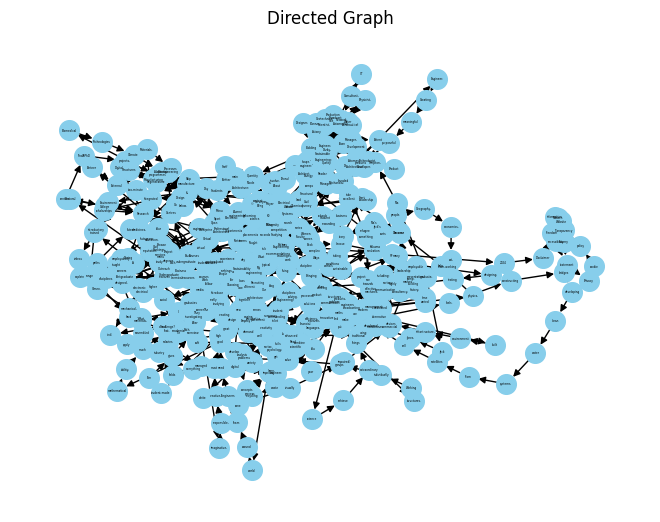

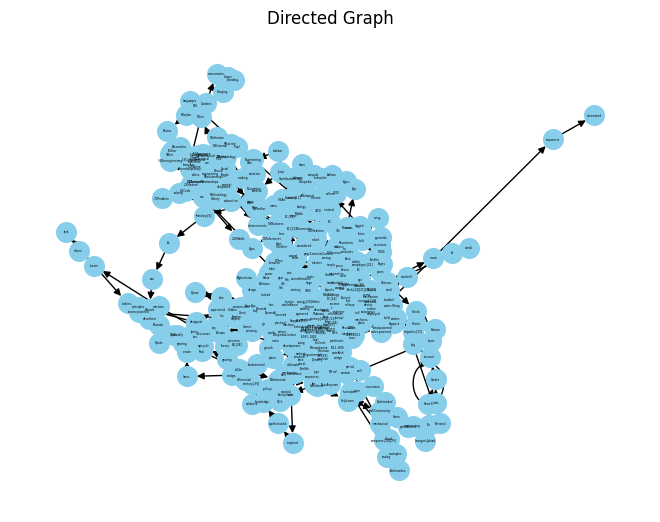

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def directedGraph(arr):
    adj_list = dict()
    prev = arr[0]
    for x in arr[1:]:
        if prev in adj_list:
            if x not in adj_list[prev]:
                adj_list[prev].append(x)
        else:
            adj_list[prev] = [x]
        prev = x
    return adj_list

def store_graph(file_name:str, data:dict):
    file_name = file_name.split('/')[-1]
    with open(f'../directedGraph/BusinessandFinance/{file_name}', 'w', encoding='utf-8') as file:
        for key, value in data.items():
            file.write(f"{key}:{','.join(value)}\n")

def visualize_graph(graph_data, file_name):
    G = nx.DiGraph()
    for node, connections in graph_data.items():
        for connection in connections:
            G.add_edge(node, connection)
    
    # Draw the graph with circular layout
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos,with_labels=True , node_size=200, node_color="skyblue", font_size=2, font_color="black", arrows=True)
    plt.title("Directed Graph")
    plt.show()

# Assuming filter_words and files are defined elsewhere
for index in range(len(filter_words)):
    graph_data = directedGraph(filter_words[index])
    visualize_graph(graph_data, files[index])
    store_graph(files[index], graph_data)
